In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
#read the cv file and show the data columns
heart_data=pd.read_csv("heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
heart_data.shape

(1025, 14)

In [ ]:
#getting some info regarding the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#staistical measure for data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#checking the distribution for target variable
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
# prompt: check for correlation between colums in targets by coefficient and

corr_matrix = heart_data.corr()
print(corr_matrix['target'].sort_values(ascending=False))


target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


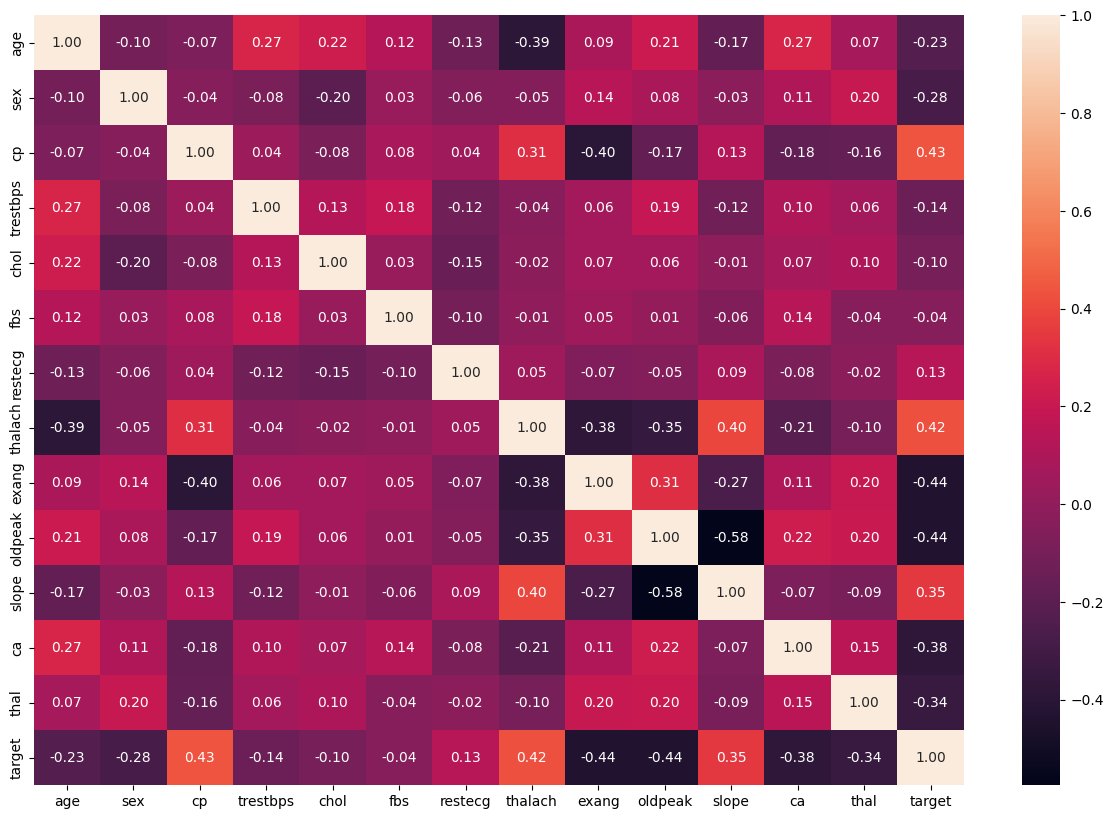

In [ ]:
# prompt: plot cell 19

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()


1 represent defitive heart
0 represent good heart

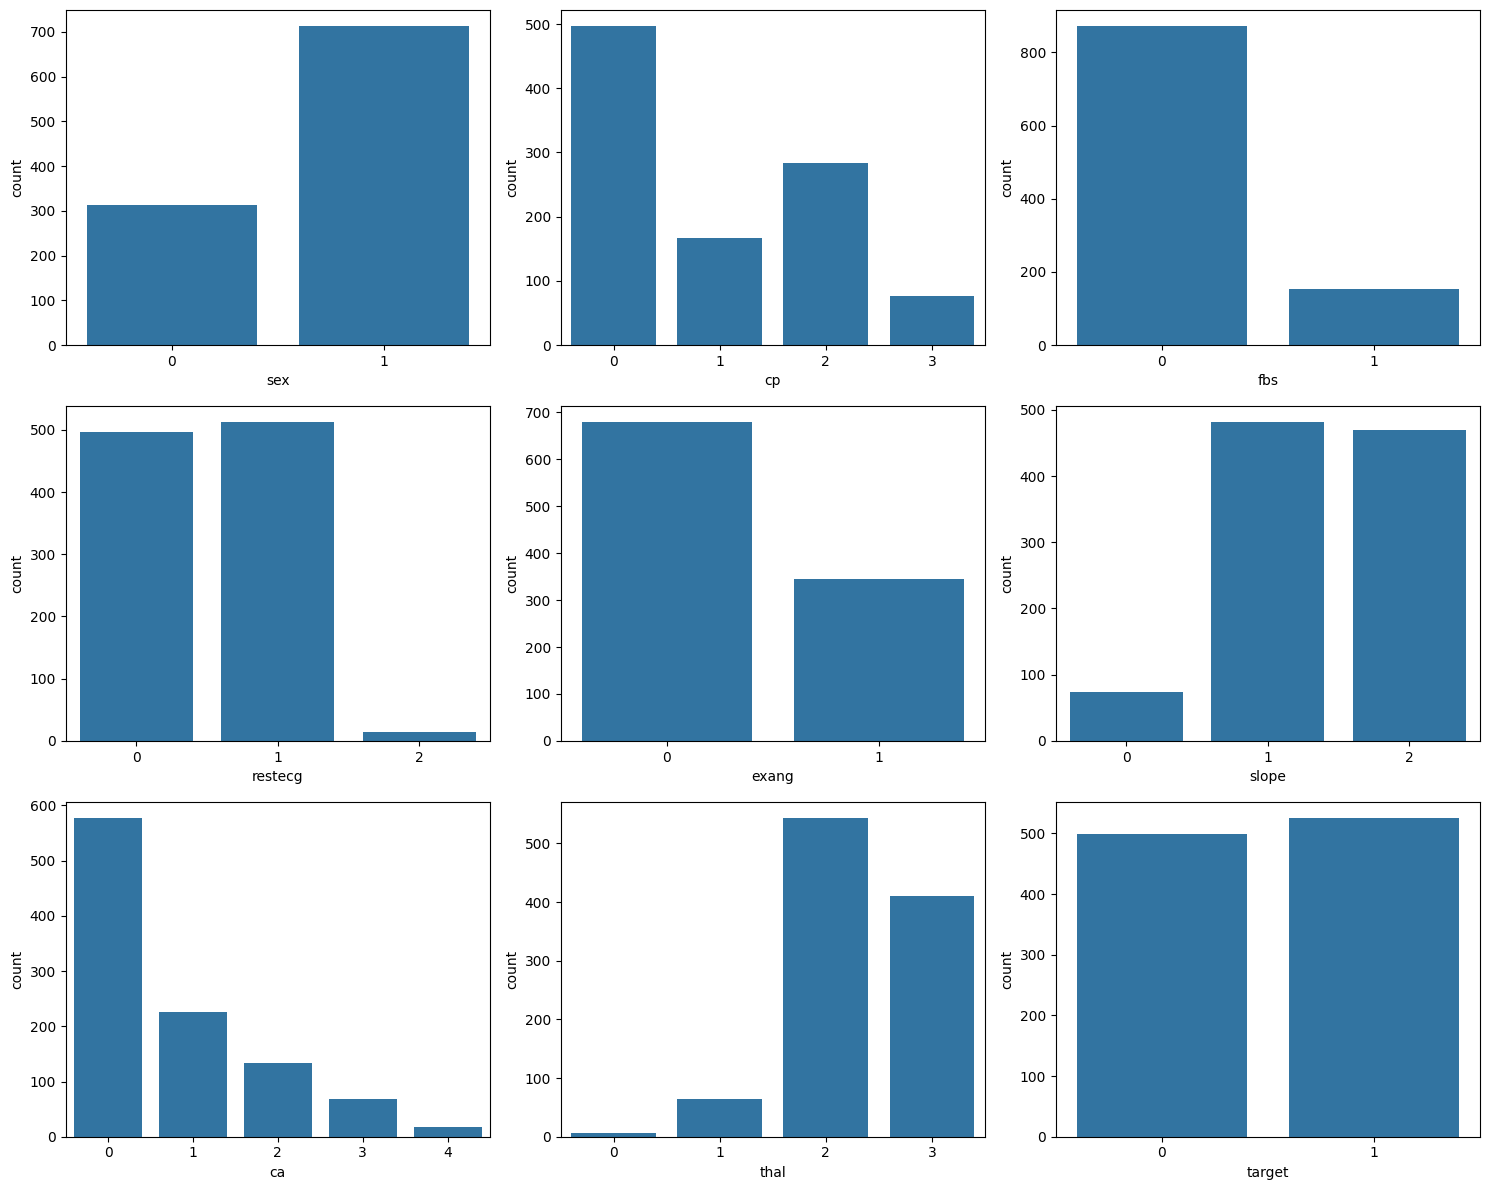

In [ ]:
# Bar plots for categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
for i, var in enumerate(categorical_vars):
    row = i // 3
    col = i % 3
    sns.countplot(x=var, data=heart_data, ax=axes[row, col])

plt.tight_layout()
plt.show()


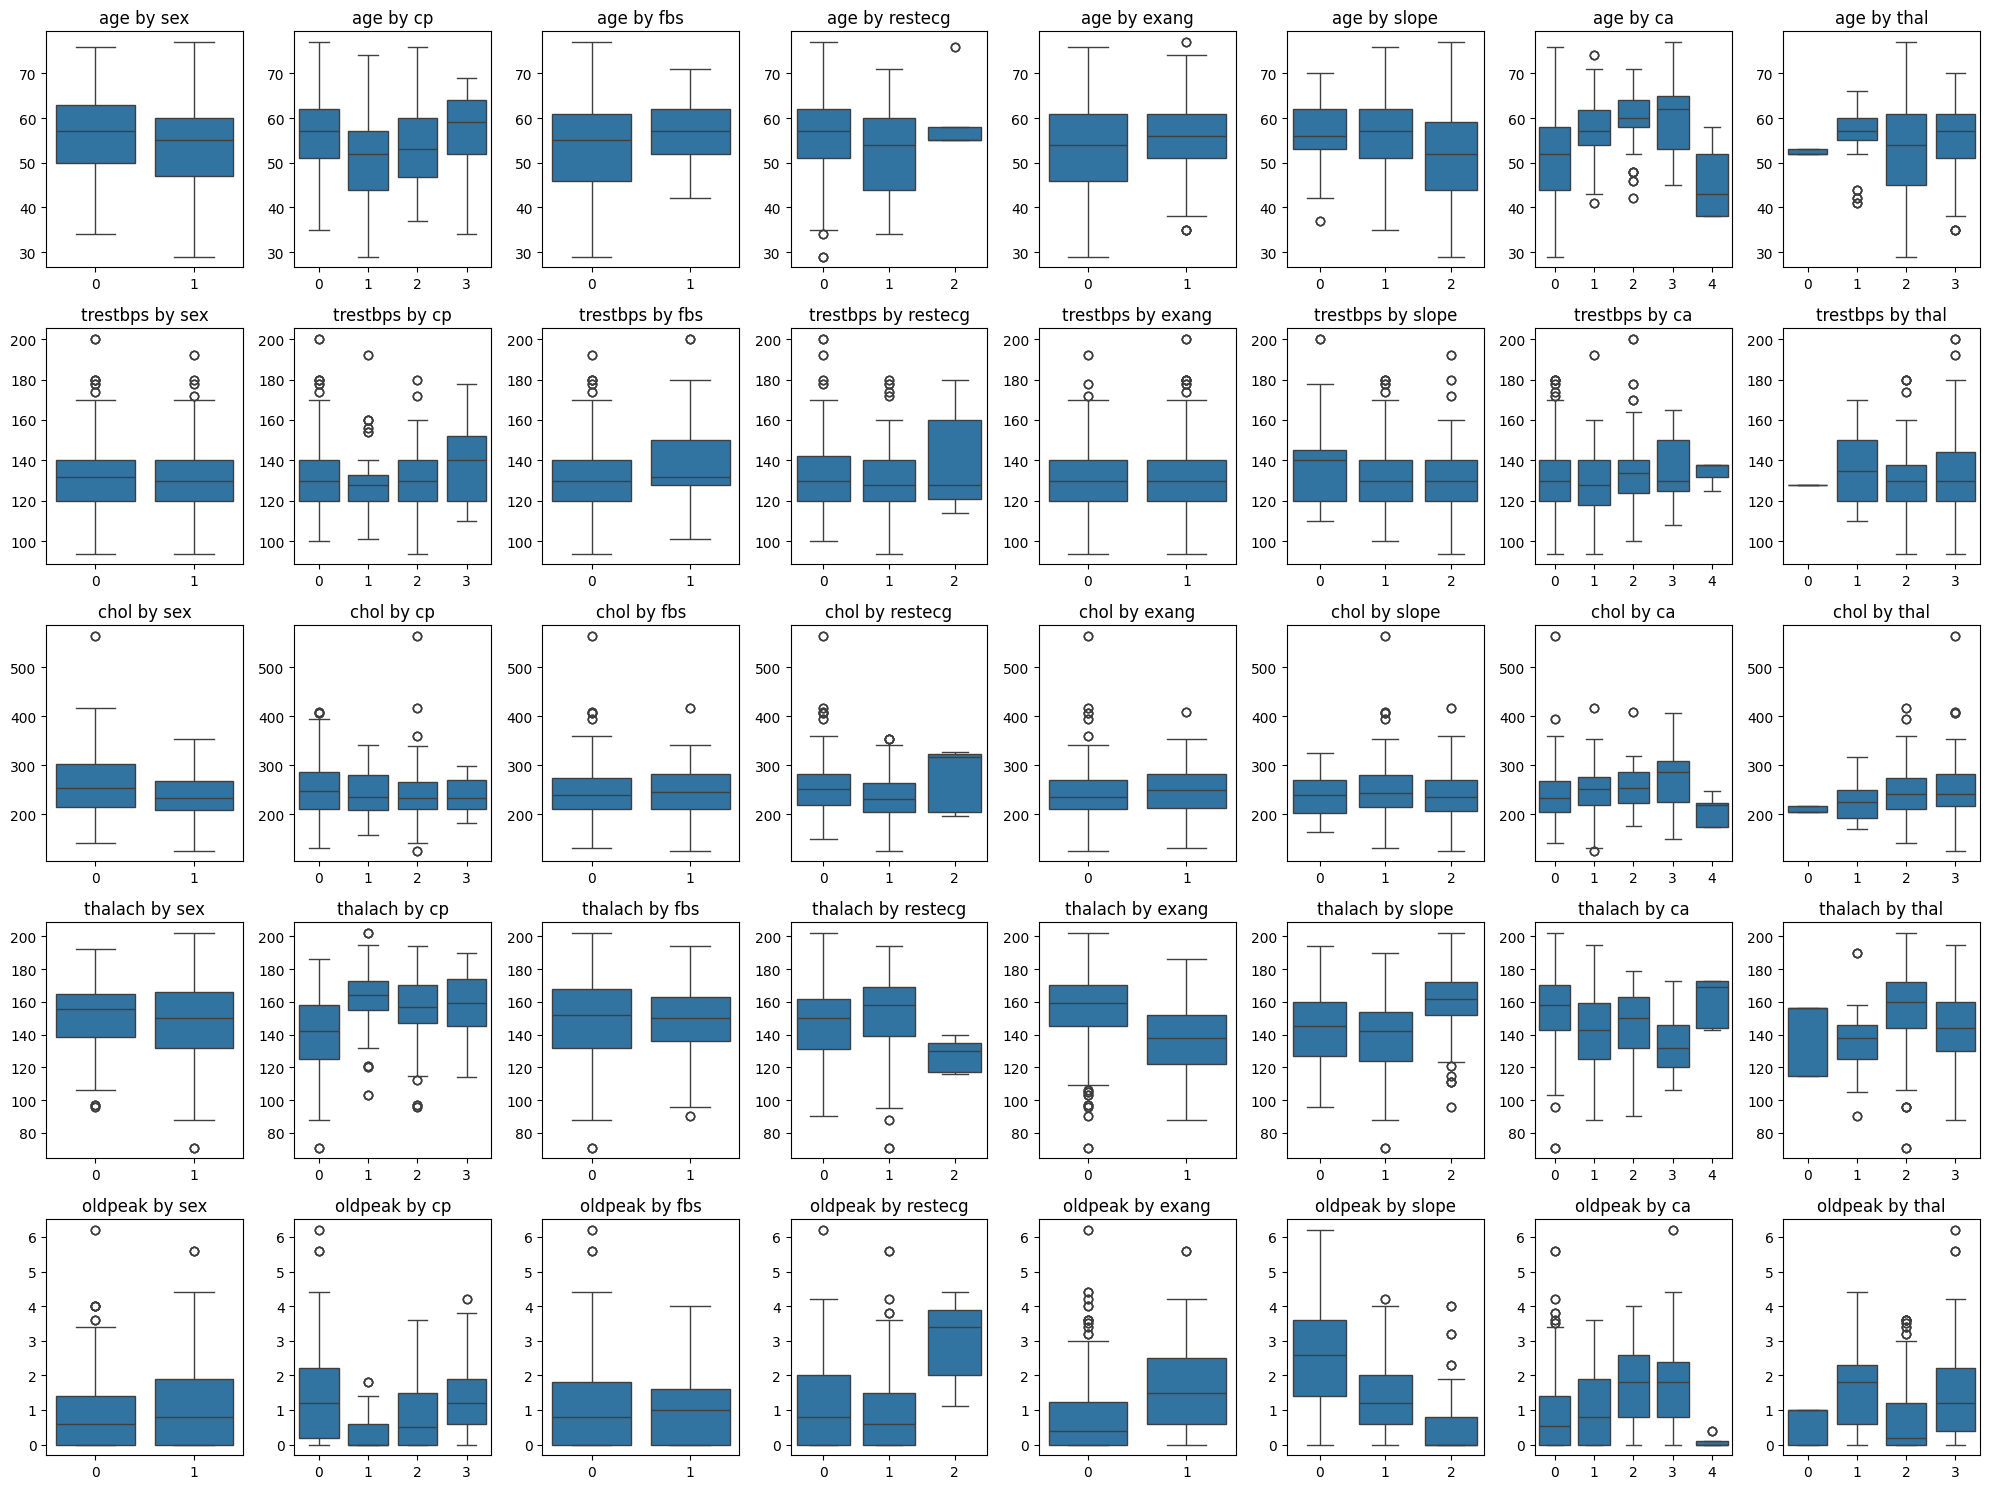

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'heart_data' is your DataFrame loaded with the dataset information

# Selecting a subset of categorical variables for visualization
categorical_vars_subset = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Selecting a subset of continuous variables to explore against categorical variables
continuous_vars_subset = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create box plots
fig, axes = plt.subplots(len(continuous_vars_subset), len(categorical_vars_subset), figsize=(20, 15))

for i, cont_var in enumerate(continuous_vars_subset):
    for j, cat_var in enumerate(categorical_vars_subset):
        sns.boxplot(ax=axes[i, j], x=heart_data[cat_var], y=heart_data[cont_var])
        axes[i, j].set_title(f'{cont_var} by {cat_var}')
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
#  write a function for examining data in terms of shape , null values and describe and type

def examine_data(df):
  """
  This function examines a DataFrame and provides information about its shape, null values, describe and type.

  Args:
      df: A Pandas DataFrame.

  Returns:
      None
  """
  # Print the shape of the DataFrame
  print("Shape:", df.shape)

  # Check for null values
  print("Null Values:")
  print(df.isnull().sum())

  # Print the describe of the DataFrame
  print("Describe:")
  print(df.describe())

  # Print the type of the DataFrame
  print("Type:")
  print(df.dtypes)

# Use the function on the heart_data DataFrame
examine_data(heart_data)


Shape: (1025, 14)
Null Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Describe:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000

In [ ]:
def preprocess_data(df, target_column):
  """
  Preprocesses data for machine learning.

  Args:
      df: The pandas DataFrame containing the data.
      target_column: The name of the target column.

  Returns:
      A pandas DataFrame containing the preprocessed data.
  """

  # Drop the target column


  # Separate features and target
  X = df.drop(columns=[target_column])
  y = df[target_column]

  # Impute missing values
  if X.isnull().sum().sum() > 0:
    X = X.select_dtypes(include=["object"]).fillna(df.mode())

  else:
    X=X.select_dtypes(include=['int64','float64']).fillna(df.mean())

  # Encode categorical columns
  # Select categorical columns
  categorical_columns = df.select_dtypes(include=["object"]).columns

  # Encode categorical columns
  ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
  encoded_X = pd.concat([X.drop(categorical_columns, axis=1),
                            pd.DataFrame(ohe.fit_transform(X[categorical_columns]))], axis=1)

  # Scale numerical columns
  numerical_columns = X.select_dtypes(exclude=["object"]).columns
  scaler = StandardScaler()
  scaled_X = pd.DataFrame(scaler.fit_transform(encoded_X[numerical_columns]), columns=numerical_columns)

  # Check if oversampling is needed
  target_counts = y.value_counts()
  majority_class_count = target_counts.max()
  minority_class_count = target_counts.min()
  imbalance_ratio = majority_class_count / minority_class_count

  if imbalance_ratio > 1.5:
    # Oversample minority class
    oversampler = RandomOverSampler()
    scaled_X, y = oversampler.fit_resample(scaled_X,y)
  else:
    y = df[target_column]

  return scaled_X, y

# Use the function on the heart_data DataFrame
scaled_X, y = preprocess_data(heart_data, "target")

# Examine the preprocessed data
examine_data(scaled_X)

Shape: (1025, 13)
Null Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64
Describe:
                age           sex            cp      trestbps          chol  \
count  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03   
mean  -3.431402e-16  1.802352e-16  5.545699e-17 -7.036106e-16 -3.466062e-18   
std    1.000488e+00  1.000488e+00  1.000488e+00  1.000488e+00  1.000488e+00   
min   -2.804866e+00 -1.511706e+00 -9.157554e-01 -2.148237e+00 -2.327054e+00   
25%   -7.095548e-01 -1.511706e+00 -9.157554e-01 -6.632165e-01 -6.787242e-01   
50%    1.726817e-01  6.615041e-01  5.593123e-02 -9.205458e-02 -1.163527e-01   
75%    7.240794e-01  6.615041e-01  1.027618e+00  4.791073e-01  5.623715e-01   
max    2.488552e+00  6.615041e-01  1.999305e+00  3.906079e+00  6.166694e+00   

                fbs       restecg       thalach     

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
y.value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
y.shape

(1025,)

In [ ]:
scaled_X.shape

(1025, 13)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pandas as pd
from joblib import dump, load

def split_and_train(scaled_X,y, model_list):
    """
    This function splits a DataFrame into training and testing sets, and then trains multiple models on the training data.
    It also evaluates each model on the testing set and returns their performance metrics.

    Args:
        df: A Pandas DataFrame.
        target_column: The name of the target column.
        model_list: A list of machine learning models.

    Returns:
        A dictionary with trained models as keys and their evaluation metrics as values.
    """
    # Separate the features and the target variable


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

    # Initialize a dictionary to hold trained models and their evaluation metrics
    model_performance = {}
    trained_models = {}

    # Train each model on the training data and evaluate
    for model in model_list:
        model.fit(X_train, y_train)
        model_name = model.__class__.__name__
        # Save the trained model to disk
        dump(model, f'{model_name}.joblib')
        # Load the trained model from disk
        model = load(f'{model_name}.joblib')

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate the evaluation metrics
        metrics = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'F1 Score': f1_score(y_test, y_pred, average='weighted', zero_division=0)
        }

        # Store the model and its performance metrics
        model_performance[model_name] = {'Model': model, 'Metrics': metrics}
        trained_models[model_name] = model

        # Optionally print the results
        print(f"Model: {model_name}")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.2f}")
        print()

    return model_performance, trained_models


In [ ]:


# Instantiate each model
model_list = [
    LogisticRegression(max_iter=1000),  # Increase max_iter if needed for convergence
    DecisionTreeClassifier(),
    SVC(probability=True),  # Enable probability for SVC to use methods like predict_proba
    KNeighborsClassifier(),
    RandomForestClassifier(),]

# Assuming 'preprocessed_heart_data' is your DataFrame and 'target' is the target column
split_and_train(scaled_X,y, model_list)




Model: LogisticRegression
Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.79

Model: DecisionTreeClassifier
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99

Model: SVC
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89

Model: KNeighborsClassifier
Accuracy: 0.83
Precision: 0.84
Recall: 0.83
F1 Score: 0.83

Model: RandomForestClassifier
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99



({'LogisticRegression': {'Model': LogisticRegression(max_iter=1000),
   'Metrics': {'Accuracy': 0.7951219512195122,
    'Precision': 0.8023441707936719,
    'Recall': 0.7951219512195122,
    'F1 Score': 0.7937867291266357}},
  'DecisionTreeClassifier': {'Model': DecisionTreeClassifier(),
   'Metrics': {'Accuracy': 0.9853658536585366,
    'Precision': 0.9857839721254356,
    'Recall': 0.9853658536585366,
    'F1 Score': 0.9853637641109759}},
  'SVC': {'Model': SVC(probability=True),
   'Metrics': {'Accuracy': 0.8878048780487805,
    'Precision': 0.8922686641556987,
    'Recall': 0.8878048780487805,
    'F1 Score': 0.8874512628987706}},
  'KNeighborsClassifier': {'Model': KNeighborsClassifier(),
   'Metrics': {'Accuracy': 0.8341463414634146,
    'Precision': 0.83869918699187,
    'Recall': 0.8341463414634146,
    'F1 Score': 0.8335281942268965}},
  'RandomForestClassifier': {'Model': RandomForestClassifier(),
   'Metrics': {'Accuracy': 0.9853658536585366,
    'Precision': 0.9857839721254

In [ ]:
model_performance, trained_models = split_and_train(scaled_X, y, model_list)

Model: LogisticRegression
Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.79

Model: DecisionTreeClassifier
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99

Model: SVC
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89

Model: KNeighborsClassifier
Accuracy: 0.83
Precision: 0.84
Recall: 0.83
F1 Score: 0.83

Model: RandomForestClassifier
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# split  preprocessed dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

# Initialize the models
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Define a function to perform cross-validation and print scores
def perform_cross_validation(model, scaled_X, y, cv=5):
    scoring = {'accuracy': 'accuracy',
               'precision': make_scorer(precision_score, average='weighted'),
               'recall': make_scorer(recall_score, average='weighted'),
               'f1': make_scorer(f1_score, average='weighted')}

    scores = cross_val_score(model, scaled_X, y, cv=cv, scoring='accuracy')
    print(f"Accuracy (mean): {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

    for metric, scorer in scoring.items():
        scores = cross_val_score(model, scaled_X, y, cv=cv, scoring=scorer)
        print(f"{metric.capitalize()} (mean): {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

# Perform cross-validation for Decision Tree
print("Decision Tree Classifier:")
perform_cross_validation(decision_tree, X_train, y_train)

# Perform cross-validation for Random Forest
print("\nRandom Forest Classifier:")
perform_cross_validation(random_forest, X_train, y_train)


Decision Tree Classifier:
Accuracy (mean): 0.98 (+/- 0.04)
Accuracy (mean): 0.98 (+/- 0.04)
Precision (mean): 0.98 (+/- 0.04)
Recall (mean): 0.98 (+/- 0.04)
F1 (mean): 0.98 (+/- 0.04)

Random Forest Classifier:
Accuracy (mean): 0.98 (+/- 0.03)
Accuracy (mean): 0.98 (+/- 0.03)
Precision (mean): 0.98 (+/- 0.03)
Recall (mean): 0.98 (+/- 0.04)
F1 (mean): 0.98 (+/- 0.04)


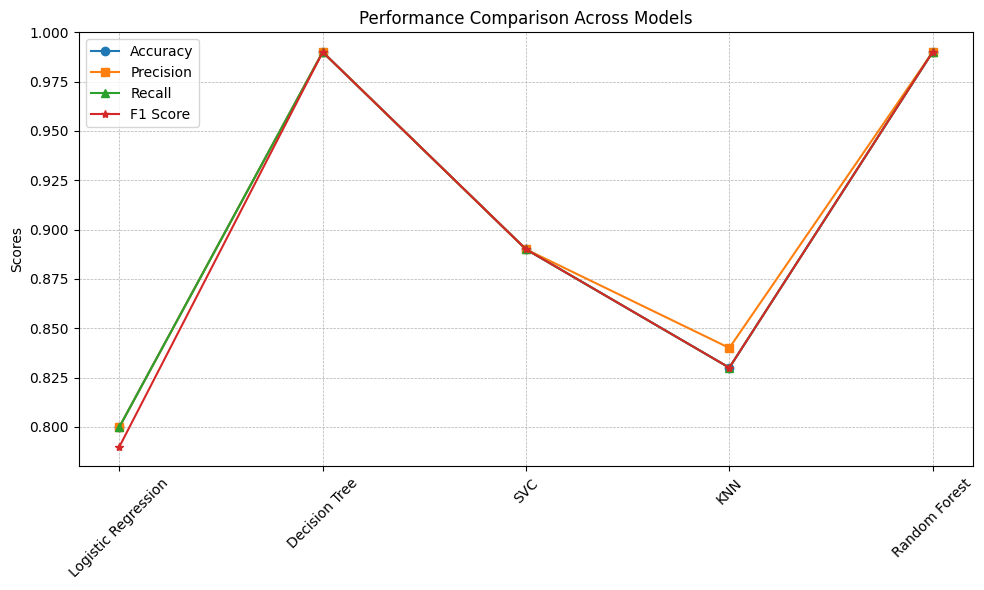

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Decision Tree', 'SVC', 'KNN', 'Random Forest']

# Scores for each model
accuracy_scores = [0.80, 0.99, 0.89, 0.83, 0.99]
precision_scores = [0.80, 0.99, 0.89, 0.84, 0.99]
recall_scores = [0.80, 0.99, 0.89, 0.83, 0.99]
f1_scores = [0.79, 0.99, 0.89, 0.83, 0.99]

# Setting the positions and width for the bars
positions = list(range(len(models)))

# Plotting each metric
plt.figure(figsize=(10, 6))

plt.plot(models, accuracy_scores, marker='o', linestyle='-', label='Accuracy')
plt.plot(models, precision_scores, marker='s', linestyle='-', label='Precision')
plt.plot(models, recall_scores, marker='^', linestyle='-', label='Recall')
plt.plot(models, f1_scores, marker='*', linestyle='-', label='F1 Score')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
plt.ylabel('Scores')
plt.title('Performance Comparison Across Models')
plt.xticks(positions, models, rotation=45)
plt.legend()

# Adding a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


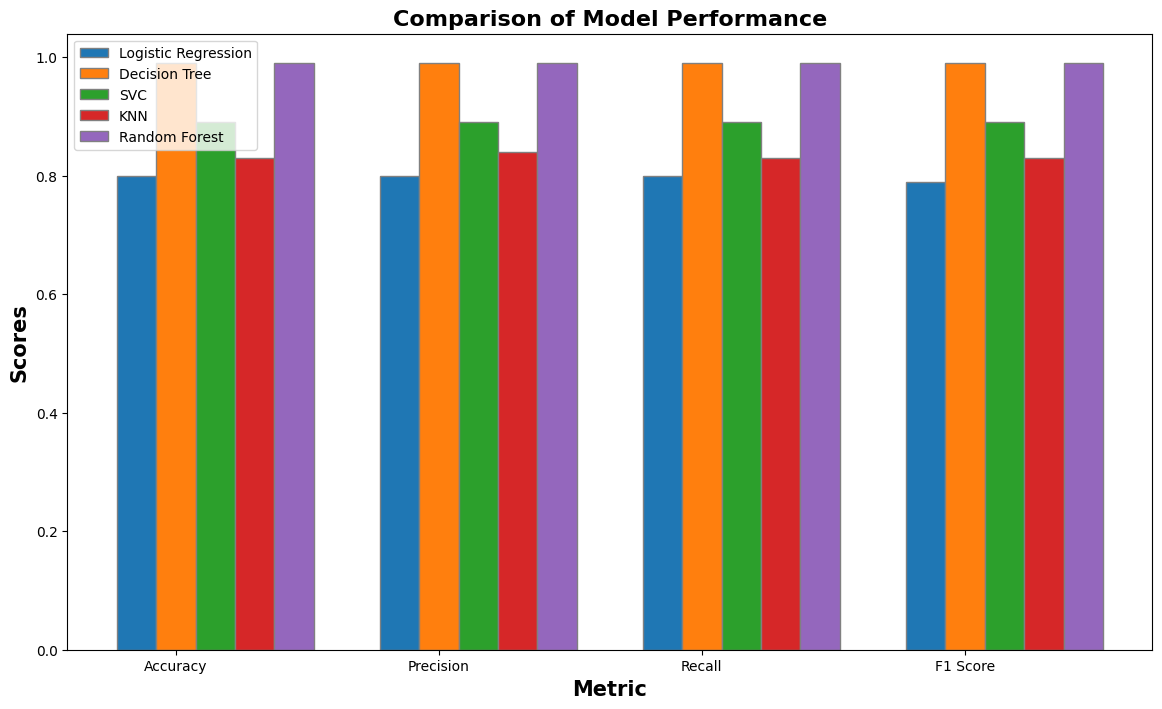

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the scores
scores = {
    'Logistic Regression': {'Accuracy': 0.80, 'Precision': 0.80, 'Recall': 0.80, 'F1 Score': 0.79},
    'Decision Tree': {'Accuracy': 0.99, 'Precision': 0.99, 'Recall': 0.99, 'F1 Score': 0.99},
    'SVC': {'Accuracy': 0.89, 'Precision': 0.89, 'Recall': 0.89, 'F1 Score': 0.89},
    'KNN': {'Accuracy': 0.83, 'Precision': 0.84, 'Recall': 0.83, 'F1 Score': 0.83},
    'Random Forest': {'Accuracy': 0.99, 'Precision': 0.99, 'Recall': 0.99, 'F1 Score': 0.99}
}

metrics = list(scores['Logistic Regression'].keys())
n_metrics = len(metrics)
n_models = len(scores)

# Create an array with the positions of each group on the x-axis
barWidth = 0.15
r = np.arange(n_metrics)

# Create the bar plots
plt.figure(figsize=(14, 8))

for i, (model, model_scores) in enumerate(scores.items()):
    plt.bar(r + i * barWidth, model_scores.values(), width=barWidth, edgecolor='grey', label=model)

# Add labels to the plot
plt.xlabel('Metric', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(n_metrics)], metrics)
plt.ylabel('Scores', fontweight='bold', fontsize=15)
plt.title('Comparison of Model Performance', fontweight='bold', fontsize=16)

# Create legend & Show graphic
plt.legend()
plt.show()


In [ ]:
print(scaled_X.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [ ]:
pip install Flask


In [ ]:
#using trained model with the best accuracy and testing it with raw dat
from joblib import load

#  'DecisionTreeClassifier.joblib' and 'RandomForestClassifier.joblib' are the filenames of your saved models
loaded_models = {
    'decision_tree': load('DecisionTreeClassifier.joblib'),
    'random_forest': load('RandomForestClassifier.joblib'),
}

input_data = [63.0, 1.0, 3.0, 145.0, 233.0, 1.0, 0.0, 150.0, 0.0, 2.3, 0.0, 0.0, 1.0]

# Reshape your input_data for a single sample prediction
input_data_reshaped = np.array(input_data).reshape(1, -1)

for model_name, model in loaded_models.items():
    prediction = model.predict(input_data_reshaped)
    if prediction[0] == 0:
        prediction = 'No Heart Disease'
    else:
        prediction = 'Heart Disease'
    print(f"{model_name} prediction:", prediction)


decision_tree prediction: No Heart Disease
random_forest prediction: No Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
!pip install joblib

In [ ]:
import joblib

In [ ]:
!pip install flask flask-ngrok


In [ ]:
pip install fastapi "uvicorn[standard]" joblib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 17.2 MB/s eta 0:00:00


In [ ]:
!pip install uvicorn

In [ ]:
import importlib
importlib.reload(uvicorn)

<module 'uvicorn' from '/usr/local/lib/python3.10/dist-packages/uvicorn/__init__.py'>

In [ ]:
# create an API in a local Host
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from typing import List
import numpy as np
from joblib import load
import uvicorn
from threading import Thread

# Define the application
app = FastAPI(title="Heart Disease Prediction API")

# Define the model input as a Pydantic model
class HeartDiseaseModelInput(BaseModel):
    age: int
    sex: int
    cp: int
    trestbps: int
    chol: int
    fbs: int
    restecg: int
    thalach: int
    exang: int
    oldpeak: float
    slope: int
    ca: int
    thal: int

# Load the pre-trained models
try:
    loaded_models = {
        'decision_tree': load('DecisionTreeClassifier.joblib'),
        'random_forest': load('RandomForestClassifier.joblib'),
    }
except FileNotFoundError as e:
    print(f"Error loading models: {e}")
    raise HTTPException(status_code=500, detail="Model files not found")

# Define the prediction endpoint
@app.post("/predict/{model_type}")
def predict(model_type: str, input: HeartDiseaseModelInput):
    if model_type not in loaded_models:
        raise HTTPException(status_code=400, detail="Model type not supported")

    # Convert the input data into an array for the model
    input_data = np.array([[
        input.age, input.sex, input.cp, input.trestbps, input.chol,
        input.fbs, input.restecg, input.thalach, input.exang,
        input.oldpeak, input.slope, input.ca, input.thal
    ]])

    # Make the prediction
    model = loaded_models[model_type]
    prediction = model.predict(input_data)

    # Return the prediction result
    result = "The person has no Heart disease" if prediction[0] == 0 else "The person is diabetic"
    return {"prediction": result}

if __name__ == "__main__":
    def run_app():
        uvicorn.run(app, host="127.0.0.1", port=8001, log_level="info")

    # Run the Uvicorn server in a background thread
    thread = Thread(target=run_app)
    thread.start()


INFO:     Started server process [1091]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8001 (Press CTRL+C to quit)


In [ ]:
import requests

# Define the URL of the FastAPI application
url = 'http://127.0.0.1:8001/predict/random_forest'

# Define the input data matching the HeartDiseaseModelInput schema
data = {
    "age": 63,
    "sex": 1,
    "cp": 3,
    "trestbps": 145,
    "chol": 233,
    "fbs": 1,
    "restecg": 0,
    "thalach": 150,
    "exang": 0,
    "oldpeak": 2.3,
    "slope": 0,
    "ca": 0,
    "thal": 1
}

# Send a POST request to the API
response = requests.post(url, json=data)

# Check if the request was successful
if response.status_code == 200:
    # Print the prediction result
    print("Response from API:", response.json())
else:
    print("Failed to get a response from the API, status code:", response.status_code)

INFO:     127.0.0.1:57980 - "POST /predict/random_forest HTTP/1.1" 200 OK
Response from API: {'prediction': 'The person has no Heart disease'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
